# Code for Experiment 3 - Maxwell Model

In [7]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Data

In [8]:
U = 5 # V

# Measurements
# f (Hz), U_0 (V), V_0 (V), T (ms), phi_Z (°), R (Ohm)
data = np.array([
    [500000,1.4,0.6,0.002,-161.5,0.2],
    [100000,4.3,1.0,0.01,-78.1,30],
    [10000,5.0,232e-3,0.1,-79.6,60],
    [6000,5.0,0.9,0.168,-67.4,400],
    [2000,5.0,0.8,0.5,-48.7,1000],
    [1500,5.0,0.7,0.672,-42.8,1000],
    [1000,5.0,0.6,1.0,-33.4,1000],
    [500,5.1,0.5,2.0,-18.8,1000],
    [100,5.1,0.5,10,-04.0,1000],
    [50,5.1,0.5,20,-02.3,1000]
])

f     = data[:,0] # in Hz
U_0   = data[:,1] # in V
V_0   = data[:,2] # in V
T     = data[:,3] # in ms
T     = [element * 10 ** -3 for element in T]  # convert to s
phi_Z = data[:,4] # in °
phi_Z = [phi_Z * np.pi /180 for phi_Z in phi_Z] # convert to radians
R     = data[:,5] # in Ohm


## Data Analysis

### Calculating and plotting impedance

<IPython.core.display.Javascript object>


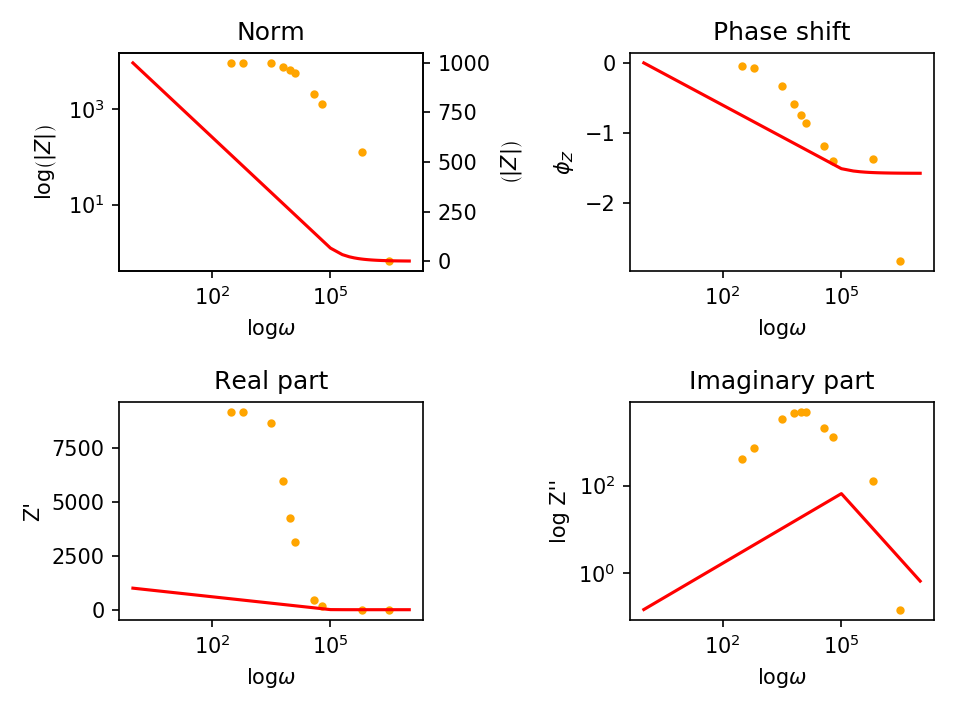

<IPython.core.display.Javascript object>


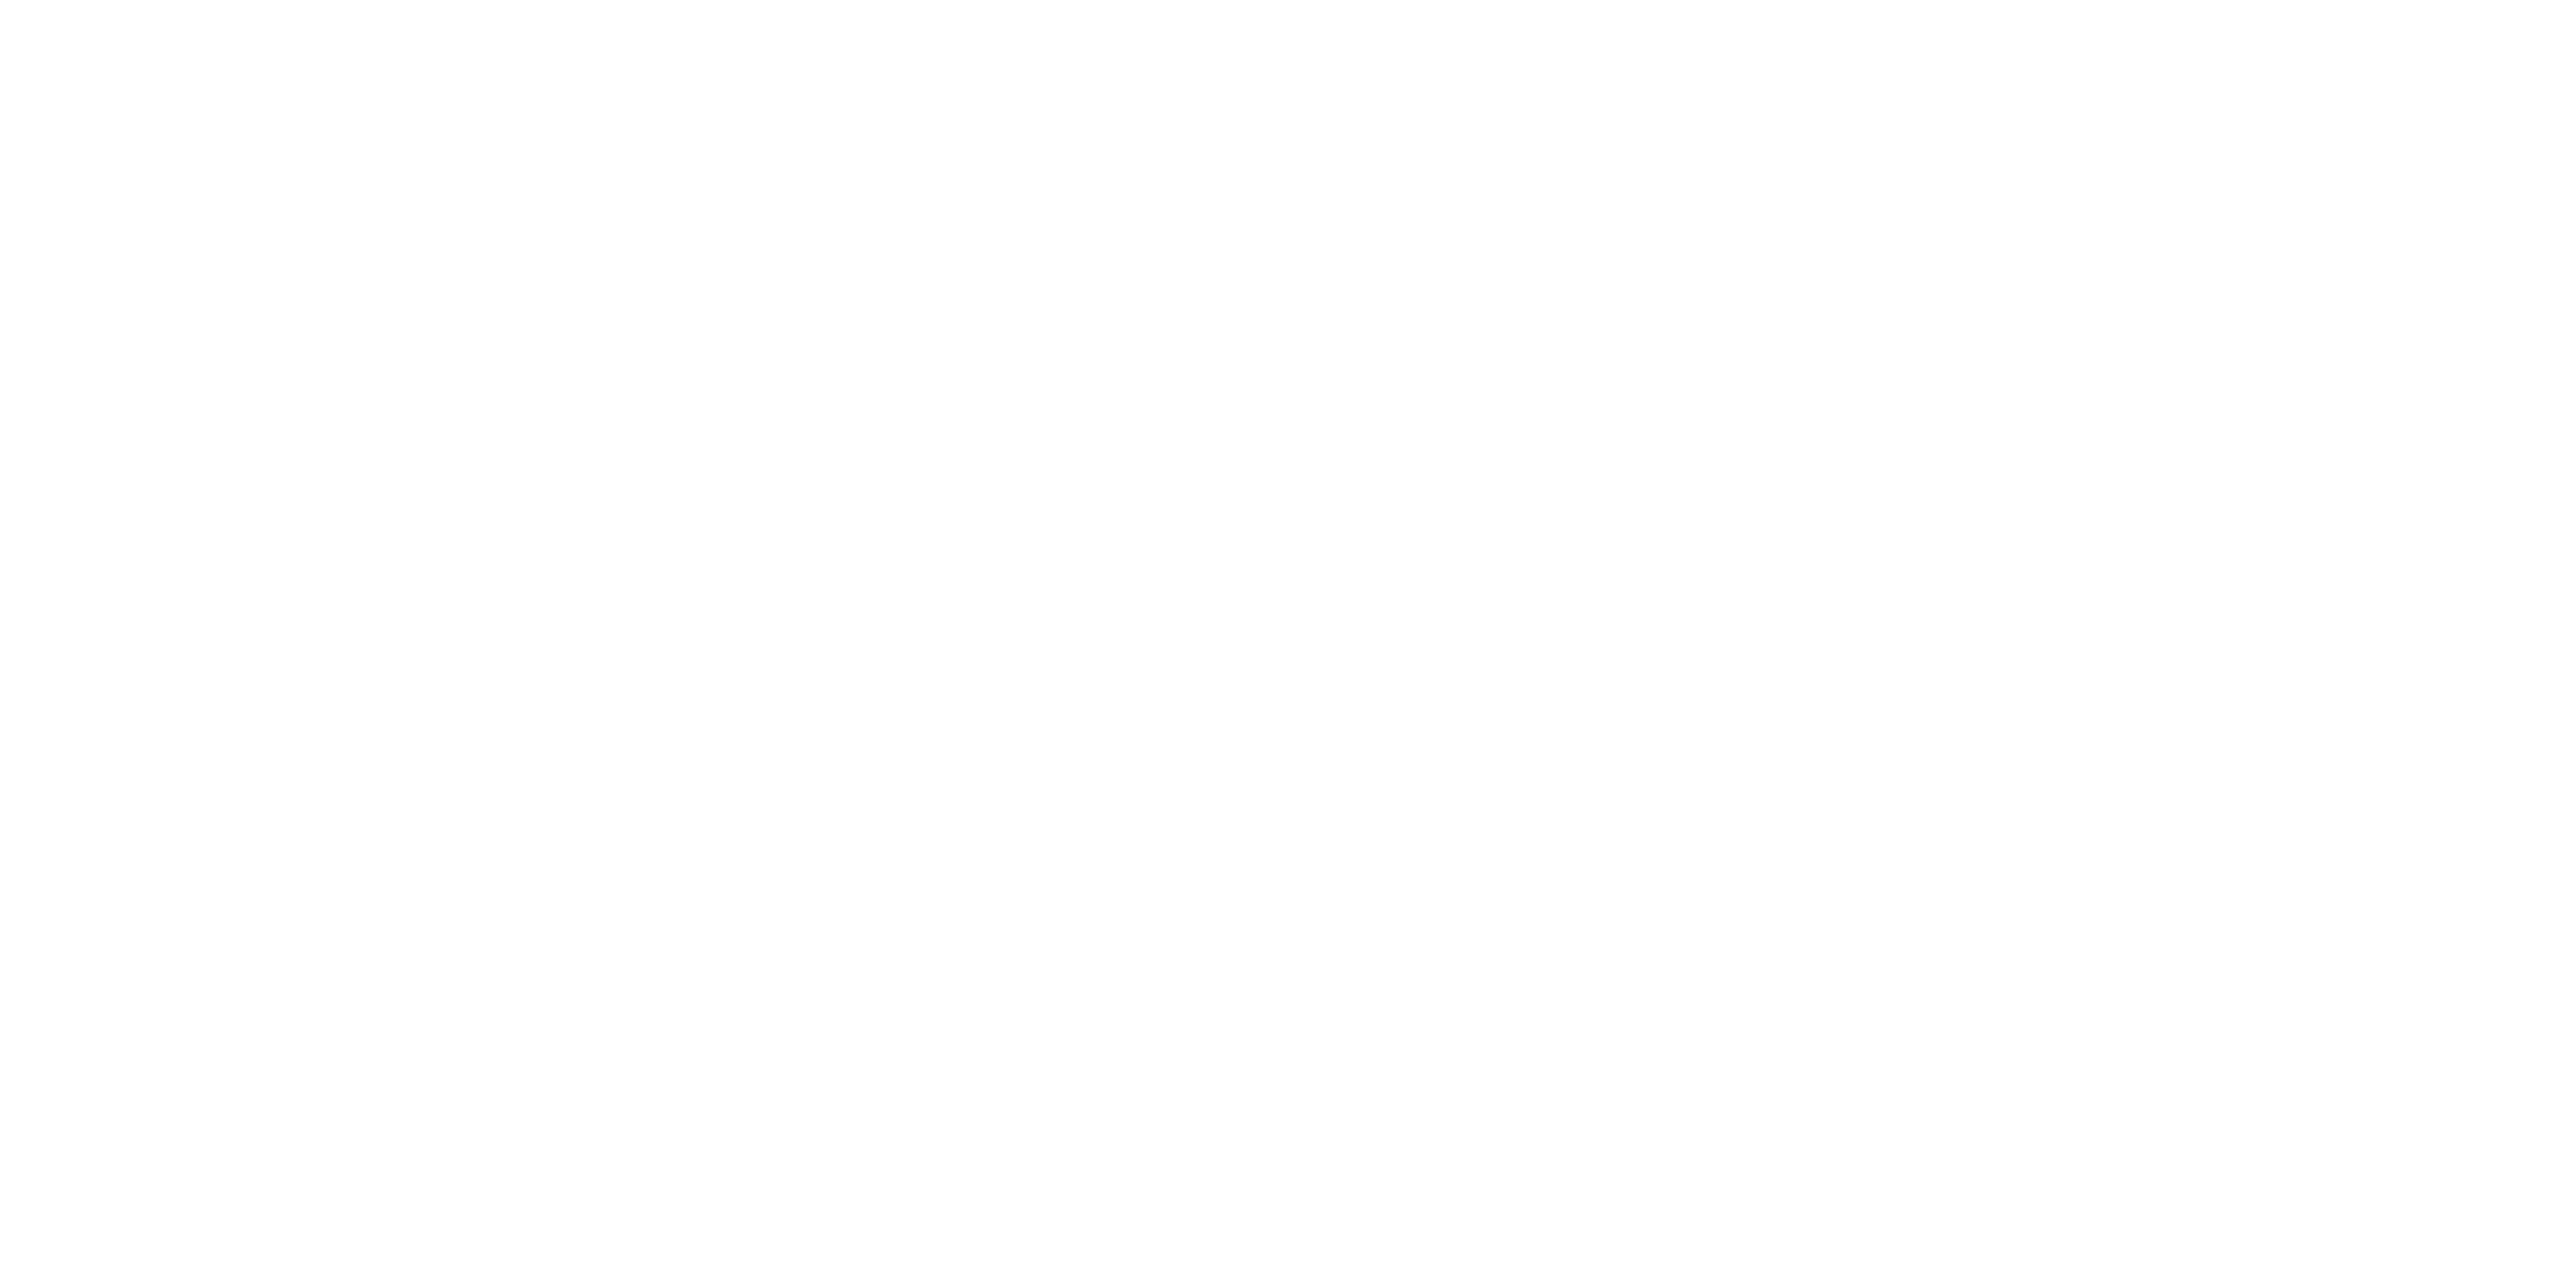

In [41]:
# Complex unit
i = 1j

# Calculate circular velocity
omega = [2 * np.pi * f for f in f]

# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z, R):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat

# Calculate experimental impedance
C = 150e-9 # in F
omega_tau = [omega*R*C for omega, R in zip(omega, R)]
Z_hat = [calculateImpedance(U_0, V_0, phi_Z, R) for U_0, V_0, phi_Z, R in zip(U_0, V_0, phi_Z, R)]
Z_hat_norm = [np.abs(z) for z in Z_hat]   # get norm of Z_hat
Z_hat_real = [z.real    for z in Z_hat]   # get real part of Z_hat
Z_hat_im   = [-z.imag   for z in Z_hat]   # get imaginary part of Z_hat

# Calculate expected impedance
R1 = 1000 # Ohm
om = np.linspace(1e0, 1e7, 100)
Z_expected = R1*((1 - i*om*R1*C)/(1 + om**2 * R1**2 * C**2))
Z_expected_norm = [np.abs(z) for z in Z_expected]   # get norm of Z_expected
Z_expected_real = R1/(1 + om**2 * R1**2 * C**2)
Z_expected_im   = R1 * (om*R1*C)/(1 + om**2 * R1**2 * C**2)
# phi_Z_expected = [-i * np.log(Z/Z_norm) for Z, Z_norm in zip(Z_expected, Z_expected_norm)]
phi_Z_expected = np.arctan(-om*R1*C)

# Z_expected_norm1 = [np.abs(z) for z in Z_expected1]   # get norm of Z_expected
# print((1/(R1**2) + om**2 * C**2))
# Z_expected_real = [z.real    for z in Z_expected1]

# Plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(omega, Z_hat_norm, '.', color='orange', label='measured')
# axs[0, 0].loglog(omega, Z_expected_norm, '.-', color='b', label='measured')
# axs[0, 0].plot(om, Z_expected_norm1, '-', color='r', label='expected')
axs[0, 0].set_title('Norm')
axs[0, 0].set_xlabel(r'$\log{\omega}$')
axs[0, 0].set_ylabel(r'$\log\left(|Z|\right)$')
ax2 = axs[0, 0].twinx()
ax2.set_ylabel(r'$\left(|Z|\right)$')
ax2.plot(om, Z_expected_norm, '-', color='r', label='expected')


axs[0, 1].semilogx(omega, phi_Z, '.', color='orange', label='measured')
axs[0, 1].plot(om, phi_Z_expected, color='r')
axs[0, 1].set_title('Phase shift')
#axs[0, 1].set_ylim([0, 3])
axs[0, 1].set_ylabel('$\phi_Z$')
axs[0, 1].set_xlabel('$\log{\omega}$')
# axs[0, 1].legend(loc='upper right')

axs[1, 0].semilogx(omega, Z_hat_real, '.', color='orange')
axs[1, 0].plot(om, Z_expected_real, '-', color='r')
axs[1, 0].set_title('Real part')
axs[1, 0].set_xlabel(r'$\log{\omega}$')
axs[1, 0].set_ylabel('Z\'')
# ax3 = axs[1, 0].twinx()
# ax3.plot(om*R1*C, Z_expected_real, '-', color='r')

axs[1, 1].loglog(omega, Z_hat_im, '.', color='orange')
axs[1, 1].plot(om, Z_expected_im, '-', color='r')
axs[1, 1].set_title('Imaginary part')
axs[1, 1].set_xlabel(r'$\log{\omega}$')
axs[1, 1].set_ylabel('log Z\'\'')

# axs[2, 0].plot(om*R1*C, Z_expected_real, '-', color='r')

plt.tight_layout()
# plt.rcParams["figure.figsize"]=10,10
plt.figure(figsize=(20,10))
plt.show()

### Calculating and plotting modulus

<IPython.core.display.Javascript object>


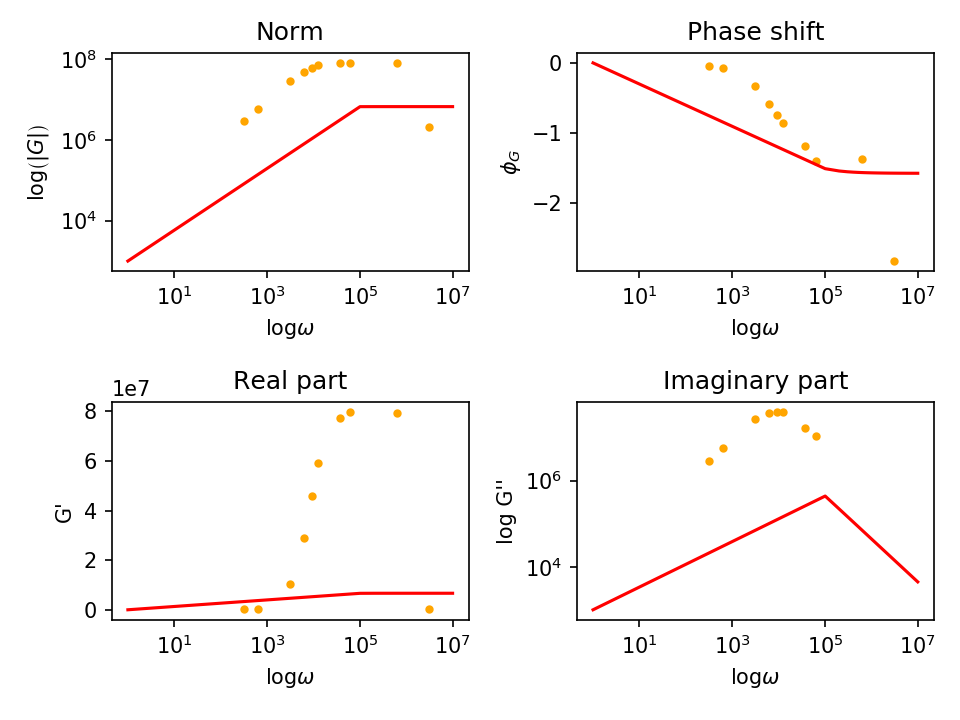

<IPython.core.display.Javascript object>


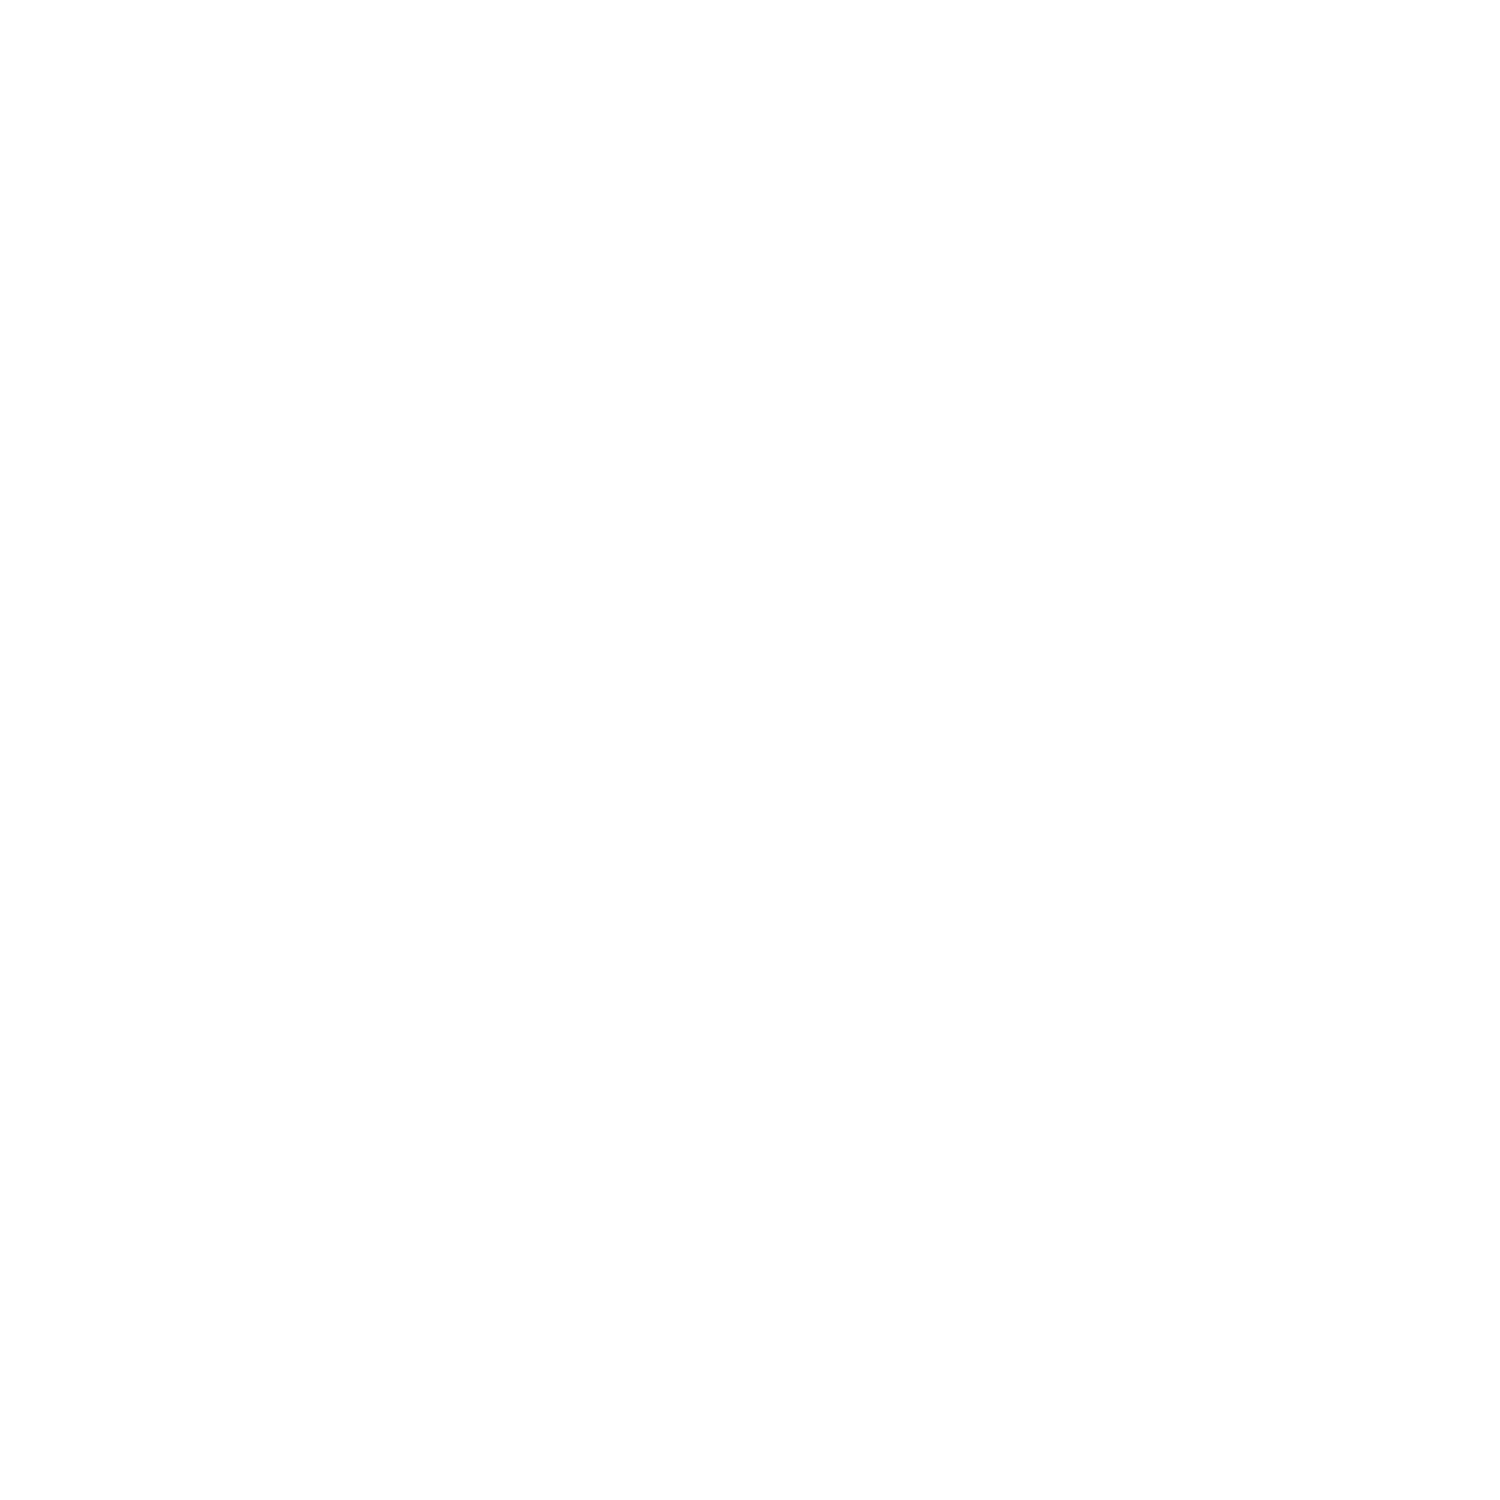

In [35]:
# Calculate experimental modulus
G      = [i*om*Z    for om, Z in zip(omega, Z_hat)]
G_norm = [np.abs(G) for G in G]
G_real = [G.real    for G in G]
G_im   = [G.imag    for G in G]
phi_G  = [-i*np.log(G/G_norm) for G, G_norm in zip(G, G_norm)]

# Calculate expected modulus
G_expected = R1 * ((i*om + om**2 * R1*C)/(1 + om**2 * R1**2 * C**2))
G_expected_norm = [np.abs(G) for G in G_expected]
G_expected_real = (om**2 * R1**2*C)/(1 + om**2 * R1**2 * C**2)
G_expected_im   = (R1*om)/(1 + om**2 * R1**2 * C**2)
phi_G_expected  = [-i*np.log(G/G_norm) for G, G_norm in zip(G_expected, G_expected_norm)]

# Plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(omega, G_norm, '.', color='orange', label='measured')
axs[0, 0].plot(om, G_expected_norm, '-', color='r', label='expected')
axs[0, 0].set_title('Norm')
axs[0, 0].set_xlabel(r'$\log{\omega}$')
axs[0, 0].set_ylabel(r'$\log\left(|G|\right)$')

axs[0, 1].semilogx(omega, phi_Z, '.', color='orange')
axs[0, 1].plot(om, phi_Z_expected, color='r')
#axs[0, 1].axhline(y = -np.pi/2, color = 'r', linestyle = '-', label=r'$-\frac{\pi}{2}$')
axs[0, 1].set_title('Phase shift')
#axs[0, 1].set_ylim([0, 3])
axs[0, 1].set_ylabel('$\phi_G$')
axs[0, 1].set_xlabel('$\log{\omega}$')
#axs[0, 1].legend(loc='upper right')

axs[1, 0].semilogx(omega, G_real, '.', color='orange')
axs[1, 0].plot(om, G_expected_real, '-', color='r')
axs[1, 0].set_title('Real part')
axs[1, 0].set_xlabel(r'$\log{\omega}$')
axs[1, 0].set_ylabel('G\'')

axs[1, 1].loglog(omega, G_im, '.', color='orange')
axs[1, 1].plot(om, G_expected_im, '-', color='r')
axs[1, 1].set_title('Imaginary part')
axs[1, 1].set_xlabel(r'$\log{\omega}$')
axs[1, 1].set_ylabel('log G\'\'')

plt.tight_layout()
# plt.rcParams["figure.figsize"]=10,10
plt.figure(figsize=(10,10))
plt.show()